In [15]:
import os
import numpy as np
import pandas as pd

import pymatgen as pg


In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [17]:

def local_min(df):

    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] > 0)]

    local_mins = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)

    return local_mins

def local_max(df):
    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] < 0)]

    local_max = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)

    return local_max

In [18]:
def finding_diff(df):
    abs_max = df['Edis'].max()
    max_val = local_max(df)
    min_val = local_min(df)

    diff = (abs_max + max_val['Edis'][0])/2 - min_val['Edis'][0]

    return diff

In [19]:
from pymatgen.core import Structure

In [20]:
#list all folders inside li_d3s
li_d3s = os.listdir("li_d3s")

results = []

df = pd.DataFrame()
cnt=0
for items in li_d3s:
    cnt+=1
    #get the path of each folder
    path = os.path.join("li_d3s", items)
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}.csv')
    struct_file = os.path.join(path, 'POSCAR')
    df = pd.read_csv(file)
    print(f"Reading {file}")

    struct = Structure.from_file(struct_file)
    sites = struct.num_sites

    # print(struct.composition['Li'])
    li_sites = struct.composition['Zn']
    counter_ion_sites = struct.composition[struct.composition.elements[1]]
   
    diff_energy = finding_diff(df)
    print(f'Composition {struct.composition}')
    print(f'diff per toal sites {diff_energy/sites}')
    print(f'diff per Zn sites {diff_energy/li_sites}')
    print('-----------------------------------')

    result = {
        "Symbol": struct.composition.elements[1],
        "Structure": struct.composition,
        "Total Sites": sites,
        "Zn Sites": li_sites,
        "Counter Ion Sites": counter_ion_sites,
        "Diff Energy": diff_energy,
        "Diff per Total Sites": diff_energy/sites,
        "Diff per Zn Sites": diff_energy/li_sites,
        "Diff per Counter Ion Sites": diff_energy/counter_ion_sites,
        "Composition": str(struct.composition)
    }

    results.append(result)
print(f'total structure analysed = {cnt}')
    

Reading li_d3s/LuZn_11496/LuZn_11496.csv
Composition Lu1 Zn1
diff per toal sites 0.017507730695642022
diff per Zn sites 0.035015461391284045
-----------------------------------
Reading li_d3s/ZnRh_6938/ZnRh_6938.csv
Composition Zn1 Rh1
diff per toal sites 0.026013947076853623
diff per Zn sites 0.052027894153707246
-----------------------------------
Reading li_d3s/ErZn2_1025096/ErZn2_1025096.csv
Composition Er2 Zn4
diff per toal sites 0.016168892530722335
diff per Zn sites 0.024253338796083504
-----------------------------------
Reading li_d3s/Er2Zn17_30963/Er2Zn17_30963.csv
Composition Er2 Zn17
diff per toal sites 0.013858821732289183
diff per Zn sites 0.015489271347852617
-----------------------------------
Reading li_d3s/Zn6Ru_1205290/Zn6Ru_1205290.csv
Composition Zn216 Ru36
diff per toal sites 0.005851459622701289
diff per Zn sites 0.006826702893151504
-----------------------------------
Reading li_d3s/Ho2Zn17_30713/Ho2Zn17_30713.csv
Composition Ho2 Zn17
diff per toal sites 0.01385

### for individual elements

In [14]:

file = "../Li_bulk/Li_fcc/Li_fcc.csv"
struct_file = '../Li_bulk/Li_fcc/POSCAR'

df = pd.read_csv(file)
print(f"Reading {file}")
struct = Structure.from_file(struct_file)
sites = struct.num_sites
# print(struct.composition['Li'])
li_sites = struct.composition['Li']

diff_energy = finding_diff(df)
print(f'Composition {struct.composition}')
print(f'diff per toal sites {diff_energy/sites}')
print(f'diff per Li sites {diff_energy/li_sites}')
print('-----------------------------------')
result = {
    "Symbol": struct.composition.elements[0],
    "Structure": struct.composition,
    "Total Sites": sites,
    "Li Sites": li_sites,
    "Diff Energy": diff_energy,
    "Diff per Total Sites": diff_energy/sites,
    "Diff per Li Sites": diff_energy/li_sites,
    "Composition": str(struct.composition)
}

result

FileNotFoundError: [Errno 2] No such file or directory: '../Li_bulk/Li_fcc/Li_fcc.csv'

In [21]:
results_df = pd.DataFrame(results)
results_df.to_csv("analysis_results.csv", index=False)

print(f"Total str.uctures analysed = {cnt}")
# print("Results saved to analysis_results.csv")

results_df

Total str.uctures analysed = 164


,Symbol,Structure,Total Sites,Zn Sites,Counter Ion Sites,Diff Energy,Diff per Total Sites,Diff per Zn Sites,Diff per Counter Ion Sites,Composition
0,Zn,"(Lu, Zn)",2,1.0,1.0,0.035015,0.017508,0.035015,0.035015,Lu1 Zn1
1,Rh,"(Zn, Rh)",2,1.0,1.0,0.052028,0.026014,0.052028,0.052028,Zn1 Rh1
2,Zn,"(Er, Zn)",6,4.0,4.0,0.097013,0.016169,0.024253,0.024253,Er2 Zn4
3,Zn,"(Er, Zn)",19,17.0,17.0,0.263318,0.013859,0.015489,0.015489,Er2 Zn17
4,Ru,"(Zn, Ru)",252,216.0,36.0,1.474568,0.005851,0.006827,0.040960,Zn216 Ru36
...,...,...,...,...,...,...,...,...,...,...
159,Zn,"(Dy, Zn)",14,11.0,11.0,0.187986,0.013428,0.017090,0.017090,Dy3 Zn11
160,Zn,"(V, Zn)",4,3.0,3.0,0.054240,0.013560,0.018080,0.018080,V1 Zn3
161,Zn,"(Sm, Zn)",14,11.0,11.0,0.209626,0.014973,0.019057,0.019057,Sm3 Zn11
162,Zn,"(Ti, Zn)",34,32.0,32.0,0.401984,0.011823,0.012562,0.012562,Ti2 Zn32


### Thougest part is to make the Feature functions data 


In [22]:
props = pd.read_csv('../all_compounds/PubChemElements_all.csv')
polarisability = pd.read_csv('../elements_polarizability.csv')

props = props[['Symbol', 'AtomicMass','AtomicRadius','Electronegativity','IonizationEnergy','ElectronAffinity']]

In [24]:
all_props = []
cnt = 0
for items in li_d3s:
    # cnt+=1
    #get the path of each folder
    path = os.path.join("li_d3s", items)
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}.csv')
    struct_file = os.path.join(path, 'POSCAR')


    struct = Structure.from_file(struct_file)
    sites = struct.num_sites

    # print(struct.composition.elements[1])

    elem = struct.composition.elements[1]
    # print(elem.symbol == 'Ge')

    matched_row = props[props['Symbol'] == elem.symbol]
    elem_polarizability = polarisability[polarisability['Symbol'] == elem.symbol]
    
    print(results_df['Diff per Total Sites'][cnt])
    # DiffPerLi = results_df[results_df['Symbol'] == elem.symbol]
    # matched_row.add('Polarizability', elem_polarizability['Polarizability'].values[0])
    matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
    matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]
    matched_row['results_per_zn'] = results_df['Diff per Total Sites'][cnt]
    # matched_row['TotalSites'] = results_df['Total Sites'][cnt]
    matched_row['ZnSites'] = results_df['Zn Sites'][cnt]
    matched_row['CounterIonSites'] = results_df['Counter Ion Sites'][cnt]
    matched_row['results_per_counter_ion'] = results_df['Diff per Total Sites'][cnt]
    # matched_row['Diff per Li Sites'] = DiffPerLi['Diff per Li Sites'].values[0]
    all_props.append(matched_row)

    cnt+=1

all_props_df = pd.concat(all_props, ignore_index=True)
    

0.017507730695642022
0.026013947076853623
0.016168892530722335
0.013858821732289183
0.005851459622701289
0.0138591192592215
0.009529162929909159
0.013427124913589316
0.0129814431299085
0.020874456946643777
0.004097735258771438
0.010626613111066526
0.010111730958869582
0.016544123696148244
0.0138054275466615
0.012640450641450432
0.0008450421961375831
0.016792856673760903
0.011320006897382141
0.009516191405574977
0.0011424745105748956
0.01398329372418908
0.01989008126640733
0.009283639459045917
0.002714426736387858
0.012541760891110502
0.013145032726722393
0.015822894812212624
0.008222696998784803
0.013034874036062575
0.012956431784355845
0.009939915092440667
0.0160747211537046
0.009733952872600843
0.009373701993491116
0.011743104705727229
0.015424189731029709
0.012125593094550921
0.010763576154845717
0.01339190865524662
0.013213921919247466
0.016370318859506707
0.018938895448663024
0.007877632041942001
0.006994757482776832
0.010971699038503905
0.013124473810946648
0.02412729228958114
0.

/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_76209/3782818515.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_76209/3782818515.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_76209/3782818515.py:32: SettingWithCopyW

In [25]:
all_props_df


,Symbol,AtomicMass,AtomicRadius,Electronegativity,IonizationEnergy,ElectronAffinity,Polarizability,results_per_total,results_per_zn,ZnSites,CounterIonSites,results_per_counter_ion
0,Zn,65.4000,139.0,1.65,9.394,NaN,38.67,0.017508,0.017508,1.0,1.0,0.017508
1,Rh,102.9055,195.0,2.28,7.459,1.137,66.00,0.026014,0.026014,1.0,1.0,0.026014
2,Zn,65.4000,139.0,1.65,9.394,NaN,38.67,0.016169,0.016169,4.0,4.0,0.016169
3,Zn,65.4000,139.0,1.65,9.394,NaN,38.67,0.013859,0.013859,17.0,17.0,0.013859
4,Ru,101.1000,207.0,2.20,7.361,1.050,72.00,0.005851,0.005851,216.0,36.0,0.005851
...,...,...,...,...,...,...,...,...,...,...,...,...
159,Zn,65.4000,139.0,1.65,9.394,NaN,38.67,0.013428,0.013428,11.0,11.0,0.013428
160,Zn,65.4000,139.0,1.65,9.394,NaN,38.67,0.013560,0.013560,3.0,3.0,0.013560
161,Zn,65.4000,139.0,1.65,9.394,NaN,38.67,0.014973,0.014973,11.0,11.0,0.014973
162,Zn,65.4000,139.0,1.65,9.394,NaN,38.67,0.011823,0.011823,32.0,32.0,0.011823


In [ ]:
# all_props_df.to_csv('all_props.csv', index=False)

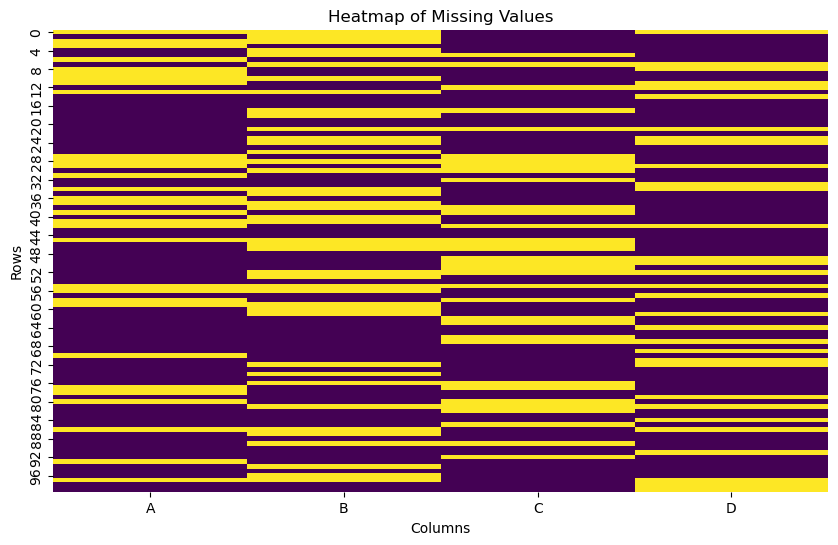

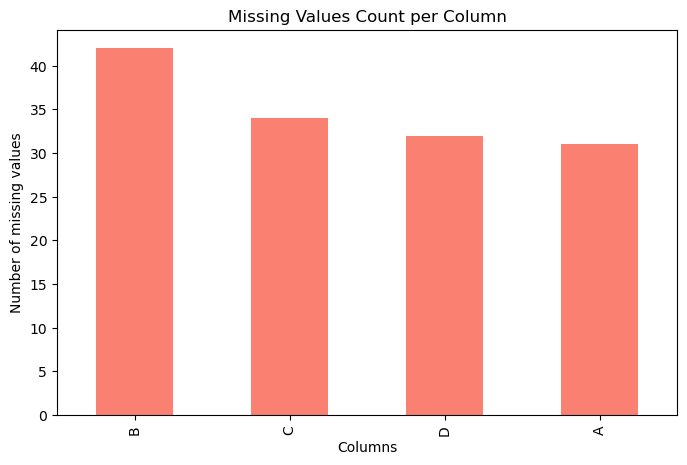

In [27]:
# show me some graphs to analyze NaN values

import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame with NaN values (replace this with your actual DataFrame)
# For demonstration, we're creating a DataFrame with some random missing values.
np.random.seed(42)
data = {
    'A': np.random.choice([1, 2, np.nan], size=100),
    'B': np.random.choice([3, 4, np.nan], size=100),
    'C': np.random.choice([5, 6, np.nan], size=100),
    'D': np.random.choice([7, 8, np.nan], size=100)
}
df = pd.DataFrame(data)

# -------------------------------
# Plot 1: Heatmap of Missing Values
# -------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# -------------------------------
# Plot 2: Bar Chart of Missing Values per Column
# -------------------------------
missing_counts = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
missing_counts.plot(kind="bar", color='salmon')
plt.ylabel("Number of missing values")
plt.xlabel("Columns")
plt.title("Missing Values Count per Column")
plt.show()

In [28]:
all_props_df.fillna(0, inplace=True)


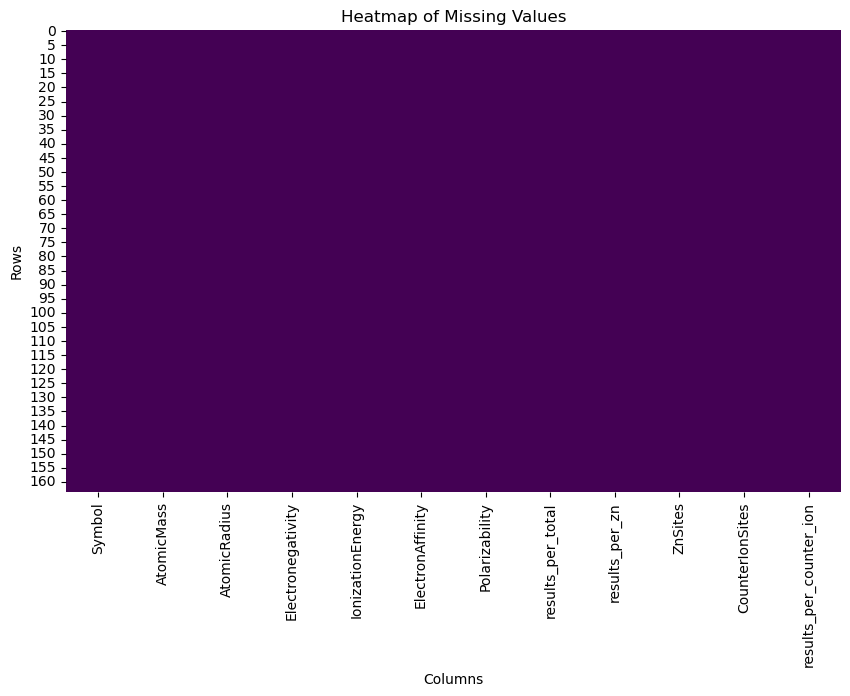

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_props_df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [30]:
all_props_df.to_csv('all_props.csv', index=False)
all_props_df = pd.read_csv('all_props.csv')

all_props_df

,Symbol,AtomicMass,AtomicRadius,Electronegativity,IonizationEnergy,ElectronAffinity,Polarizability,results_per_total,results_per_zn,ZnSites,CounterIonSites,results_per_counter_ion
0,Zn,65.4000,139.0,1.65,9.394,0.000,38.67,0.017508,0.017508,1.0,1.0,0.017508
1,Rh,102.9055,195.0,2.28,7.459,1.137,66.00,0.026014,0.026014,1.0,1.0,0.026014
2,Zn,65.4000,139.0,1.65,9.394,0.000,38.67,0.016169,0.016169,4.0,4.0,0.016169
3,Zn,65.4000,139.0,1.65,9.394,0.000,38.67,0.013859,0.013859,17.0,17.0,0.013859
4,Ru,101.1000,207.0,2.20,7.361,1.050,72.00,0.005851,0.005851,216.0,36.0,0.005851
...,...,...,...,...,...,...,...,...,...,...,...,...
159,Zn,65.4000,139.0,1.65,9.394,0.000,38.67,0.013428,0.013428,11.0,11.0,0.013428
160,Zn,65.4000,139.0,1.65,9.394,0.000,38.67,0.013560,0.013560,3.0,3.0,0.013560
161,Zn,65.4000,139.0,1.65,9.394,0.000,38.67,0.014973,0.014973,11.0,11.0,0.014973
162,Zn,65.4000,139.0,1.65,9.394,0.000,38.67,0.011823,0.011823,32.0,32.0,0.011823
